import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df = pd.read_csv("C:/Users/yuvra/Downloads\\REIT Turnover Data.csv")

In [105]:
df.tail()

,Hire Date,Term Date,Tenure,Pay Band,Type,Classification,Job Function,Job Level,Department,Location,Reason for Leaving,Race,Ethnicity,Gender,Age,Status
Employee ID,,,,,,,,,,,,,,,,
EMP2564,12/19/2022,NaN,0.18,"$35,000 - $55,000",Regular,Full Time,Community/Resort Office,TM,MH Operations,Headquarters,NaN,White,Non-Hispanic or Latino,Female,60,Active
EMP2565,12/20/2022,NaN,0.18,"$55,000 - $105,000",Regular,Full Time,Main Office,PRO,Innovation,Headquarters,NaN,White,Non-Hispanic or Latino,Male,33,Active
EMP2566,12/22/2022,NaN,0.17,"Less than $35,000",Regular,Part Time,Community/Resort Office,TM,MH Operations,Headquarters,NaN,White,Non-Hispanic or Latino,Female,70,Active
EMP2567,12/27/2022,NaN,0.16,"$35,000 - $55,000",Regular,Full Time,Community Management,CM,MH Operations,Headquarters,NaN,White,Non-Hispanic or Latino,Female,40,Active
EMP2568,12/28/2022,NaN,0.15,"Less than $35,000",Seasonal,Part Time,Community/Resort Office,TM,RV Operations,Headquarters,NaN,White,Non-Hispanic or Latino,Female,53,Active


In [106]:
df.columns
df['Job Function'].value_counts()

Job Function
Community/Resort Office    1244
Main Office                 623
Community Management        353
Resort Management           179
Sales                       105
Operations Leadership        64
Name: count, dtype: int64

In [61]:
df.set_index("Employee ID" ,inplace = True)

In [43]:
# sns.heatmap(df.corr(),annot =True)
# plt.show()


In [21]:
df.dtypes

Hire Date              object
Term Date              object
Tenure                float64
Pay Band               object
Type                   object
Classification         object
Job Function           object
Job Level              object
Department             object
Location               object
Reason for Leaving     object
Race                   object
Ethnicity              object
Gender                 object
Age                     int64
Status                 object
dtype: object

In [63]:
# # Remove extra spaces from column names and fix the list
# cat = ['Tenure', "Pay Band", "Type", "Classification", "Job Function", "Job Level", "Department", "Gender", "Age", "Status"]

# # Calculate the correlation for the selected columns
# correlation_matrix = df[cat].corr()

# # Print the correlation matrix
# print(correlation_matrix)


In [48]:
cat = ["Tenure","Pay Band","Type","Classification","Job Function","Job Level","Department","Gender","Age","Status"]

In [64]:
#separate numerical type column and object type column and store in new dataset
df_num=df.select_dtypes(["int64","float64"])#hold to int and float type data 
df_cat=df.select_dtypes(object)#hold object type data

In [52]:
df_num

,Tenure,Age
Employee ID,,
EMP001,29.20,68
EMP002,29.20,67
EMP003,28.34,66
EMP004,24.46,64
EMP005,25.49,60
...,...,...
EMP2564,0.18,60
EMP2565,0.18,33
EMP2566,0.17,70


In [ ]:
df_cat

In [67]:
#change the object type data into numerical type then use LabelEncoder class
from sklearn.preprocessing import LabelEncoder

for col in df_cat :
    le=LabelEncoder() #create the object of LabelEncoder class
    df_cat[col]=le.fit_transform(df_cat[col])

In [68]:
df_cat.corr()

,Hire Date,Term Date,Pay Band,Type,Classification,Job Function,Job Level,Department,Location,Reason for Leaving,Race,Ethnicity,Gender,Status
Hire Date,1.000000,0.003526,-0.020814,0.021380,-0.005256,-0.021474,0.005332,0.015450,NaN,-0.014745,-0.040344,-0.001574,-0.014336,0.014360
Term Date,0.003526,1.000000,-0.144098,-0.099741,-0.142208,0.080561,-0.148591,-0.123298,NaN,0.658552,-0.007126,-0.089488,0.047638,-0.786442
Pay Band,-0.020814,-0.144098,1.000000,0.178738,0.224021,0.010873,0.470037,0.078922,NaN,-0.157492,0.051865,0.058326,-0.141652,0.206049
Type,0.021380,-0.099741,0.178738,1.000000,0.287483,-0.103242,0.198907,0.162907,NaN,-0.143102,0.026847,0.008143,-0.092199,0.281403
Classification,-0.005256,-0.142208,0.224021,0.287483,1.000000,-0.083044,0.256076,0.148262,NaN,-0.123173,0.027138,0.052669,-0.112496,0.196457
Job Function,-0.021474,0.080561,0.010873,-0.103242,-0.083044,1.000000,0.104948,-0.055112,NaN,0.098437,-0.035493,-0.065917,0.195026,-0.127245
Job Level,0.005332,-0.148591,0.470037,0.198907,0.256076,0.104948,1.000000,0.230414,NaN,-0.179206,0.001293,0.079952,-0.205834,0.225380
Department,0.015450,-0.123298,0.078922,0.162907,0.148262,-0.055112,0.230414,1.000000,NaN,-0.115598,0.097539,-0.000612,-0.108758,0.179943
Location,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reason for Leaving,-0.014745,0.658552,-0.157492,-0.143102,-0.123173,0.098437,-0.179206,-0.115598,NaN,1.000000,0.034757,-0.109909,0.030275,-0.813118


In [69]:
df['Tenure'].describe()

count    2568.000000
mean        3.296051
std         3.923999
min         0.000000
25%         0.610000
50%         1.845000
75%         4.680000
max        29.200000
Name: Tenure, dtype: float64

In [72]:
df['Classification'].count()

2568

# EMPLOYEE TENURE

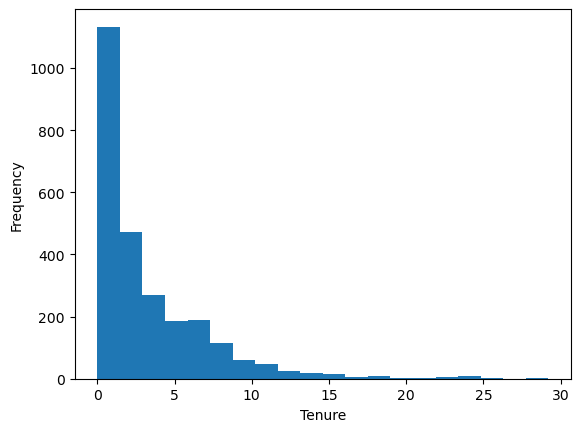

In [73]:
import matplotlib.pyplot as plt
df['Tenure'].plot.hist(bins=20)
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

In [84]:
 df.groupby('Job Function')['Tenure'].mean()

Job Function
Community Management       4.519547
Community/Resort Office    1.873424
Main Office                4.639101
Operations Leadership      7.975781
Resort Management          4.134246
Sales                      3.787429
Name: Tenure, dtype: float64

In [82]:
df.groupby('Department')['Tenure'].mean()

Department
Accounting                      4.645577
Acquisition                     8.533750
Asset Management                8.965455
Bright Insurance                6.775000
Call Center                     4.452000
Capital Markets                 4.865000
Closing                         6.685556
Construction Services           5.521765
Executive Management           13.118182
Finance                         4.173333
Financial Operations            6.670000
Financial Planning              2.954375
Human Resources                 3.309604
Information Technology          5.065946
Innovation                      3.072090
Internal Audit                  1.868000
Jellystone Park Ops             1.388750
Loss Mitigation                 4.660000
MH Operations                   3.499271
Marketing                       4.945532
Operations Support              5.121750
RV Operations                   2.190940
RV Strategy                     5.726667
Revenue Management              5.899231
Sales

In [85]:
pay_band_turnover = df.groupby('Pay Band')['Status'].value_counts(normalize=True).unstack()
pay_band_turnover

Status,Active,Terminated
Pay Band,,
"$105,000 - $155,000",0.847458,0.152542
"$35,000 - $55,000",0.675539,0.324461
"$55,000 - $105,000",0.784114,0.215886
"Less than $35,000",0.418433,0.581567
"More than $155,000",0.905882,0.094118


In [87]:
common_reasons = df['Reason for Leaving'].value_counts()
common_reasons

Reason for Leaving
Personal Reasons/Family                 359
Better Opportunity                      222
Dissatisfied with Job                   101
Dissatisfied with Working Conditions     83
Relocation                               65
Retirement                               62
Returning to School                      36
Dissatisfied with Pay/Benefits           35
Ineligible for FLMA                      22
Dissatisfied with Supervisor             19
Lack of Advancement Opportunities        13
Insufficient Training                     2
Name: count, dtype: int64

In [104]:
# reasons_by_job_function = df.groupby('Job Function')['Reason for Leaving'].value_counts()
reasons_by_department = df.groupby('Department')['Reason for Leaving'].value_counts()
reasons_by_job_function
# reasons_by_department

Job Function             Reason for Leaving                  
Community Management     Personal Reasons/Family                  33
                         Retirement                               17
                         Better Opportunity                       15
                         Relocation                               11
                         Dissatisfied with Working Conditions     10
                         Dissatisfied with Job                     9
                         Ineligible for FLMA                       4
                         Dissatisfied with Pay/Benefits            3
                         Dissatisfied with Supervisor              1
                         Lack of Advancement Opportunities         1
Community/Resort Office  Personal Reasons/Family                 261
                         Better Opportunity                      146
                         Dissatisfied with Working Conditions     64
                         Dissatisfied wit

In [ ]:
gender_distribution = df['Gender'].value_counts()

In [98]:
#GENDERS LEAVING
gender_reason_group = df.groupby(['Reason for Leaving', 'Gender'])
gender_reason_counts = gender_reason_group.size().unstack().fillna(0)
gender_reason_counts

Gender,Female,Male
Reason for Leaving,,
Better Opportunity,164.0,58.0
Dissatisfied with Job,81.0,20.0
Dissatisfied with Pay/Benefits,26.0,9.0
Dissatisfied with Supervisor,15.0,4.0
Dissatisfied with Working Conditions,72.0,11.0
Ineligible for FLMA,17.0,5.0
Insufficient Training,2.0,0.0
Lack of Advancement Opportunities,8.0,5.0
Personal Reasons/Family,311.0,48.0


In [100]:
df['Gender'].value_counts()

Gender
Female    1991
Male       577
Name: count, dtype: int64

In [107]:
df.head()

,Hire Date,Term Date,Tenure,Pay Band,Type,Classification,Job Function,Job Level,Department,Location,Reason for Leaving,Race,Ethnicity,Gender,Age,Status
Employee ID,,,,,,,,,,,,,,,,
EMP001,12/9/1993,NaN,29.20,"More than $155,000",Regular,Full Time,Main Office,EXEC,Executive Management,Headquarters,NaN,White,Chose Not to Disclose,Male,68,Active
EMP002,12/9/1993,NaN,29.20,"$55,000 - $105,000",Regular,Full Time,Main Office,EXEC,Acquisition,Headquarters,NaN,White,Chose Not to Disclose,Male,67,Active
EMP003,8/15/1994,12/16/2022,28.34,"More than $155,000",Regular,Full Time,Operations Leadership,OPSSVP,MH Operations,Headquarters,Retirement,White,Chose Not to Disclose,Male,66,Terminated
EMP004,1/15/1996,6/30/2020,24.46,"More than $155,000",Regular,Full Time,Operations Leadership,OPSSVP,MH Operations,Headquarters,Retirement,White,Chose Not to Disclose,Male,64,Terminated
EMP005,8/25/1997,NaN,25.49,"$55,000 - $105,000",Regular,Full Time,Resort Management,RVRM,RV Operations,Headquarters,NaN,White,Chose Not to Disclose,Female,60,Active


# STATUS analysis


In [110]:
status_counts = df['Status'].value_counts()
status_counts

Status
Active        1549
Terminated    1019
Name: count, dtype: int64

In [111]:
status_by_tenure = df.groupby('Tenure')['Status'].value_counts(normalize=True).unstack()
status_by_job_function = df.groupby('Job Function')['Status'].value_counts(normalize=True).unstack()


In [126]:
status_by_tenure.sum()

Status
Active        541.051247
Terminated    247.948753
dtype: float64

In [121]:
status_by_job_function

Status,Active,Terminated
Job Function,,
Community Management,0.705382,0.294618
Community/Resort Office,0.450161,0.549839
Main Office,0.783307,0.216693
Operations Leadership,0.843750,0.156250
Resort Management,0.709497,0.290503
Sales,0.676190,0.323810



# LOCATION TURNOVER


In [136]:
location_turnover = df.groupby('Location')['Status'].value_counts(normalize=True).unstack()
department_turnover = df.groupby('Department')['Status'].value_counts(normalize=True).unstack()

In [139]:
location_turnover

Status,Active,Terminated
Location,,
Headquarters,0.603193,0.396807


In [140]:
department_turnover

Status,Active,Terminated
Department,,
Accounting,0.884615,0.115385
Acquisition,0.750000,0.250000
Asset Management,1.000000,NaN
Bright Insurance,0.833333,0.166667
Call Center,0.714286,0.285714
Capital Markets,1.000000,NaN
Closing,0.888889,0.111111
Construction Services,0.882353,0.117647
Executive Management,1.000000,NaN


In [159]:

# df.groupby(['Job Function', 'Job Level'])['Pay Band'].mean()


In [160]:
df.head()

,Hire Date,Term Date,Tenure,Pay Band,Type,Classification,Job Function,Job Level,Department,Location,Reason for Leaving,Race,Ethnicity,Gender,Age,Status
Employee ID,,,,,,,,,,,,,,,,
EMP001,12/9/1993,NaN,29.20,[More than $155000],Regular,Full Time,Main Office,EXEC,Executive Management,Headquarters,NaN,White,Chose Not to Disclose,Male,68,Active
EMP002,12/9/1993,NaN,29.20,"[$55000 , $105000]",Regular,Full Time,Main Office,EXEC,Acquisition,Headquarters,NaN,White,Chose Not to Disclose,Male,67,Active
EMP003,8/15/1994,12/16/2022,28.34,[More than $155000],Regular,Full Time,Operations Leadership,OPSSVP,MH Operations,Headquarters,Retirement,White,Chose Not to Disclose,Male,66,Terminated
EMP004,1/15/1996,6/30/2020,24.46,[More than $155000],Regular,Full Time,Operations Leadership,OPSSVP,MH Operations,Headquarters,Retirement,White,Chose Not to Disclose,Male,64,Terminated
EMP005,8/25/1997,NaN,25.49,"[$55000 , $105000]",Regular,Full Time,Resort Management,RVRM,RV Operations,Headquarters,NaN,White,Chose Not to Disclose,Female,60,Active


In [162]:
df['Term Date'].isnull().sum()

1549

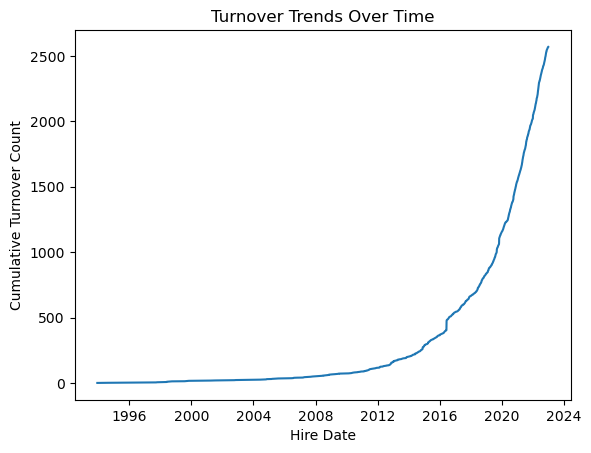

In [166]:
df['Hire Date'] = pd.to_datetime(df['Hire Date'])
df['Term Date'] = pd.to_datetime(df['Term Date'])

# Create a line chart to visualize turnover trends over time
turnover_over_time = df.groupby('Hire Date').size().cumsum()
plt.plot(turnover_over_time)
plt.xlabel('Hire Date')
plt.ylabel('Cumulative Turnover Count')
plt.title('Turnover Trends Over Time')
plt.show()

<AxesSubplot:>

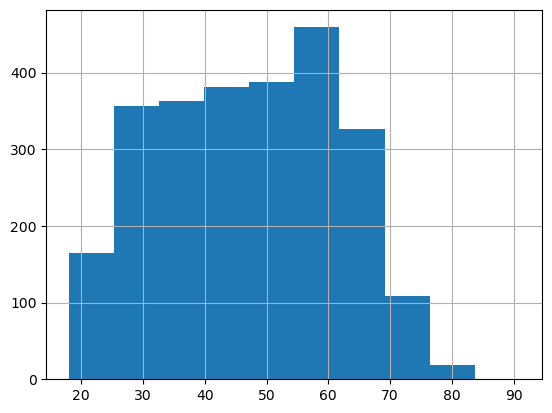

In [167]:
df['Age'].hist()

In [165]:
df_num.corr()

,Tenure,Age
Tenure,1.000000,0.179904
Age,0.179904,1.000000
